In [12]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [35]:
df = pd.read_csv('C:/Users/campus4D045/Desktop/데이터분석/data/car_ad.csv')
df.head()

,Region,State,Location,manufacturer,car_model,car_option,Year,Price,New_Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Mileage_unit
0,South,Maharashtra,Mumbai,Maruti,Wagon,R LXI CNG,2010,2682.68,NaN,72000,CNG,Manual,First,37.2400,998 CC,58.16 bhp,5.0,kmpl
1,South,Maharashtra,Pune,Hyundai,Creta,1.6 CRDi SX Option,2015,19162.00,NaN,41000,Diesel,Manual,First,16.7195,1582 CC,126.2 bhp,5.0,kmpl
2,South,Tamil Nadu,Chennai,Honda,Jazz,V,2011,6898.32,8.61 Lakh,46000,Petrol,Manual,First,13.6500,1199 CC,88.7 bhp,5.0,kmpl
3,South,Tamil Nadu,Chennai,Maruti,Ertiga,VDI,2012,9197.76,NaN,87000,Diesel,Manual,First,17.6545,1248 CC,88.76 bhp,7.0,kmpl
4,South,Tamil Nadu,Coimbatore,Audi,A4,New 2.0 TDI Multitronic,2013,27194.71,NaN,40670,Diesel,Automatic,Second,12.9200,1968 CC,140.8 bhp,5.0,kmpl


In [36]:
df.isnull().sum()

Region                  0
State                   0
Location                0
manufacturer            0
car_model               0
car_option              0
Year                    0
Price                   0
New_Price            5129
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                  25
Seats                   0
Mileage_unit            0
dtype: int64

In [37]:
df['Power'].fillna('0 bhp', inplace = True)
df['Power'] = df['Power'].replace('null', '0 bhp')

In [38]:
df['Power'] = df['Power'].round()

In [40]:
df[['Power','Power_unit']] = df['Power'].str.split(expand=True)
df['Power'] = df['Power'].astype('float64')

ValueError: Columns must be same length as key

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
max_value = df['Kilometers_Driven'].max()

print('Max value of Kilometers_Driven:', max_value)

In [ ]:
# df['Kilometers_Driven'] = df['Kilometers_Driven'].replace(max_value, np.nan)

# # NaN 값 제거
# df_cleaned = df.dropna(subset=['Kilometers_Driven'], inplace = True)

In [ ]:
unique_car_models = df[df['Power'] == 0]['car_model'].unique()
print(unique_car_models)

In [ ]:
swift_power = df[df['car_model'].str.contains('Swift', na=False)]['Power']

print((swift_power))

In [149]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
fiesta_df = df[df['car_model'].str.contains('Fiesta')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_fiesta_df = fiesta_df[~fiesta_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_fiesta_df['Power'].mean()

print("Fiesta 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

Fiesta 모델의 Power 열 평균 (제외값 포함된 경우 제외): 74.27


In [150]:
df.loc[(df['car_model'].str.contains('Fiesta')) & (df['Power'] == 0), 'Power'] = 74.27

In [151]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
s_df = df[df['car_model'].str.contains('Santro')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_s_df = s_df[~s_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_s_df['Power'].mean()

print("'Santro' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'Santro' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 62.37


In [152]:
df.loc[(df['car_model'].str.contains('Santro')) & (df['Power'] == 0), 'Power'] = 62.37

In [153]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains('Swift')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print("'Swift' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'Swift' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 77.86


In [154]:
df.loc[(df['car_model'].str.contains('Swift')) & (df['Power'] == 0), 'Power'] = 77.86

In [155]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains('Indica')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print("'Indica' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'Indica' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 67.68


In [156]:
df.loc[(df['car_model'].str.contains('Indica')) & (df['Power'] == 0), 'Power'] = 67.68

In [157]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains('Etios')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print("'Etios' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'Etios' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 76.55


In [158]:
df.loc[(df['car_model'].str.contains('Etios')) & (df['Power'] == 0), 'Power'] = 76.55

In [162]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains('City')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print("'City' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'City' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 110.79


In [163]:
df.loc[(df['car_model'].str.contains('City')) & (df['Power'] == 0), 'Power'] = 110.79

In [166]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains( 'Optra')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print(" 'Optra' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

 'Optra' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 112.41


In [167]:
df.loc[(df['car_model'].str.contains( 'Optra')) & (df['Power'] == 0), 'Power'] = 112.41

In [168]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains('Bolero')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print("'Bolero' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'Bolero' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 63.28


In [169]:
df.loc[(df['car_model'].str.contains('Bolero')) & (df['Power'] == 0), 'Power'] = 63.28

In [170]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains('Micra')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print("'Micra' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'Micra' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 68.78


In [171]:
df.loc[(df['car_model'].str.contains('Bolero')) & (df['Power'] == 0), 'Power'] = 68.78

In [172]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains('E-Class')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print("'E-Class' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'E-Class' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 204.28


In [173]:
df.loc[(df['car_model'].str.contains('E-Class')) & (df['Power'] == 0), 'Power'] = 204.28

In [176]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains('5')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print("'5' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'5' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 179.34


In [177]:
df.loc[(df['car_model'].str.contains('5')) & (df['Power'] == 0), 'Power'] = 179.34

In [178]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains('Wagon')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print("'Wagon' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'Wagon' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 66.28


In [179]:
df.loc[(df['car_model'].str.contains('Wagon')) & (df['Power'] == 0), 'Power'] = 66.28

In [180]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains('Teana')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print("'Wagon' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'Wagon' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 179.5


In [181]:
df.loc[(df['car_model'].str.contains('Teana')) & (df['Power'] == 0), 'Power'] = 179.5

In [182]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains('CR-V')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print("'CR-V' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'CR-V' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 153.77


In [183]:
df.loc[(df['car_model'].str.contains('CR-V')) & (df['Power'] == 0), 'Power'] = 153.77

In [184]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains('Esteem')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print("'Esteem' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'Esteem' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 85.0


In [185]:
df.loc[(df['car_model'].str.contains('Esteem')) & (df['Power'] == 0), 'Power'] = 85.0

In [186]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains('Endeavour')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print("'Endeavour' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'Endeavour' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 169.18


In [187]:
df.loc[(df['car_model'].str.contains('Endeavour')) & (df['Power'] == 0), 'Power'] = 169.18

In [188]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains('A4')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print("'A4' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'A4' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 164.24


In [189]:
df.loc[(df['car_model'].str.contains('A4')) & (df['Power'] == 0), 'Power'] = 164.24

In [190]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains('Punto')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print("'Punto' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'Punto' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 75.23


In [191]:
df.loc[(df['car_model'].str.contains('Punto')) & (df['Power'] == 0), 'Power'] = 75.23

In [192]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains('Baleno')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print("'Baleno' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'Baleno' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 83.08


In [193]:
df.loc[(df['car_model'].str.contains('Baleno')) & (df['Power'] == 0), 'Power'] = 83.08

In [194]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains('Jazz')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print("'Jazz' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'Jazz' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 91.2


In [195]:
df.loc[(df['car_model'].str.contains('Jazz')) & (df['Power'] == 0), 'Power'] = 91.2

In [198]:
# 제외할 Power 값 지정
excluded_power_values = [0]  # 제외할 Power 값 리스트

# 'car_model'에 'Fiesta'가 포함된 행 필터링
ss_df = df[df['car_model'].str.contains('Laura')]

# 제외할 Power 값이 아닌 경우만 필터링
filtered_ss_df = ss_df[~ss_df['Power'].isin(excluded_power_values)]

# 'Power' 열의 평균 계산
average_power = filtered_ss_df['Power'].mean()

print("'Laura' 모델의 Power 열 평균 (제외값 포함된 경우 제외):", average_power.round(2))

'Laura' 모델의 Power 열 평균 (제외값 포함된 경우 제외): 122.62


In [199]:
df.loc[(df['car_model'].str.contains('Laura')) & (df['Power'] == 0), 'Power'] = 122.62

In [200]:
# 포함된 문자열 리스트
models = ['Cayman', 'Petra', 'Estilo', '1000', 'Laura']

# 각 모델이 포함된 행의 수를 계산
counts = {model: df['car_model'].str.contains(model, na=False).sum() for model in models}

print(counts)

{'Cayman': 2, 'Petra': 1, 'Estilo': 3, '1000': 1, 'Laura': 29}


In [204]:
df.to_csv('car_aa.csv', index=False)

In [205]:
# 포함된 문자열 리스트
models = ['Cayman', 'Petra', 'Estilo', '1000', 'Laura']

# 각 모델이 포함된 행들 필터링
filtered_df = df[df['car_model'].str.contains('|'.join(models), na=False)]

# 'Power' 열 조회
power_values = filtered_df['Power']

print(power_values)

194     106.00
277     105.00
424     138.10
550     105.00
802     105.00
841     105.00
911       0.00
1048    106.00
1298      0.00
1326    157.80
1483    138.10
1616    138.10
1775    157.80
2014    138.10
2273      0.00
2335      0.00
2349    138.10
2647    157.80
2765    105.00
2982    108.50
3031    108.50
3040    106.00
3637    106.00
3833      0.00
4240    138.10
4312    138.10
4313    157.80
4371    108.50
4430    105.00
4652      0.00
5335    106.00
5532    106.00
5658    138.10
5825      0.00
5857    122.62
5879    106.00
Name: Power, dtype: float64


In [227]:
# 'car_model'에 'Laura'가 포함된 행 필터링
laura_power_values = df[df['car_model'].str.contains('1000', na=False)]['Power']

print(laura_power_values)

4652    0.0
Name: Power, dtype: float64


In [216]:
#포함하는 car_model을 가진 행을 필터링
cayman_df = df[df['car_model'].str.contains('Micra')]

# Power 값이 0이 아닌 행만 필터링
cayman_df_non_zero_power = cayman_df[cayman_df['Power'] != 0]

# Power의 평균을 계산
average_power = cayman_df_non_zero_power['Power'].mean()
print(average_power)

68.7770588235294


In [316]:
df.loc[df['Mileage_unit'] == 'km/kg', 'Mileage'] *= 1.4
df['Mileage_unit'] = df['Mileage_unit'].replace('km/kg', 'kmpl')

df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Mileage_unit
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,37.24,998 CC,58.16 bhp,5.0,NaN,kmpl
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,kmpl
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,8.61 Lakh,kmpl
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,NaN,kmpl


In [317]:
null_mileage_names = df[df['Mileage'].isnull()]['Name']
print(null_mileage_names)

4446         Mahindra E Verito D4
4904    Toyota Prius 2009-2016 Z4
Name: Name, dtype: object


In [318]:
specific_mileage = df[df['Name'].isin(['Mahindra E Verito D4', 'Toyota Prius 2009-2016 Z4'])]['Fuel_Type']
print(specific_mileage)

4446    Electric
4904    Electric
Name: Fuel_Type, dtype: object


In [319]:
df.dropna(subset = ['Mileage'], inplace = True)

In [320]:
df['Seats'].fillna(df['Seats'].mean, inplace = True)

In [321]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                  46
Seats                   0
New_Price            6246
Mileage_unit            0
dtype: int64

In [322]:
df['Price'].fillna(df['Price'].mean, inplace = True)
df['Engine'].fillna(df['Engine'].mean, inplace = True)
df['Power'].fillna(df['Power'].mean, inplace = True)

In [323]:
df[['Engine','Engine_unit']] = df['Engine'].str.split(expand=True)

In [324]:
df[['Power','Power_unit']] = df['Power'].str.split(expand=True)

In [325]:
df['Engine'] = df['Engine'].astype('float64')

In [326]:
df.replace('null', np.nan, inplace=True)
df['Power'] = df['Power'].astype('float64')

In [327]:
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Mileage_unit,Engine_unit,Power_unit
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,NaN,kmpl,CC,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.0,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,kmpl,CC,bhp
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,kmpl,CC,bhp
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,kmpl,CC,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,kmpl,CC,bhp


<Axes: >

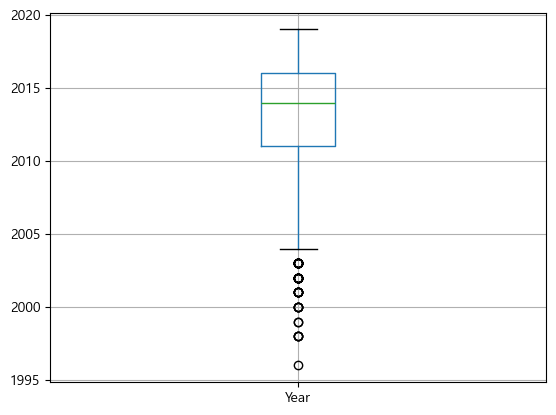

In [328]:
df.boxplot(['Year'])

<Axes: >

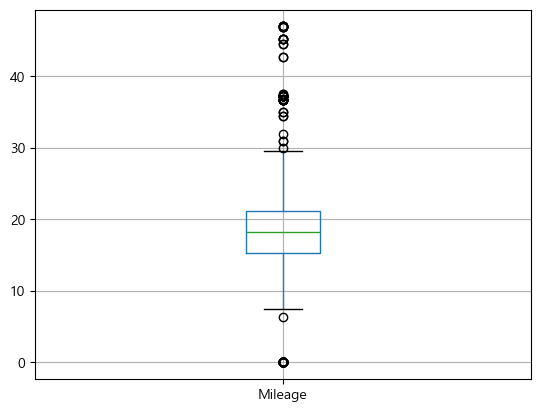

In [329]:
df.boxplot(['Mileage'])

<Axes: >

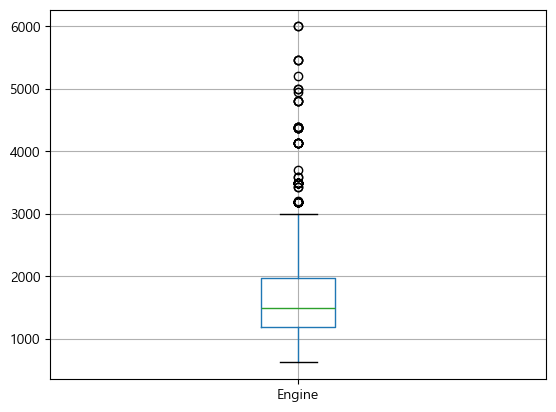

In [330]:
df.boxplot(['Engine'])

<Axes: >

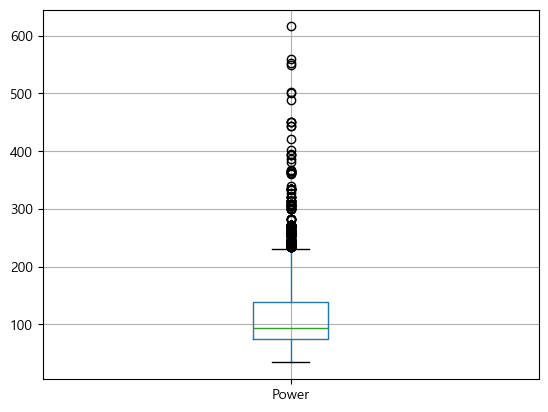

In [331]:
df.boxplot(['Power'])

<Axes: >

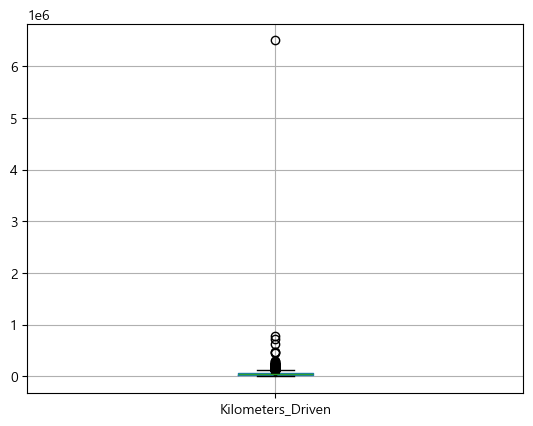

In [346]:
df.boxplot(['Kilometers_Driven'])

<Axes: >

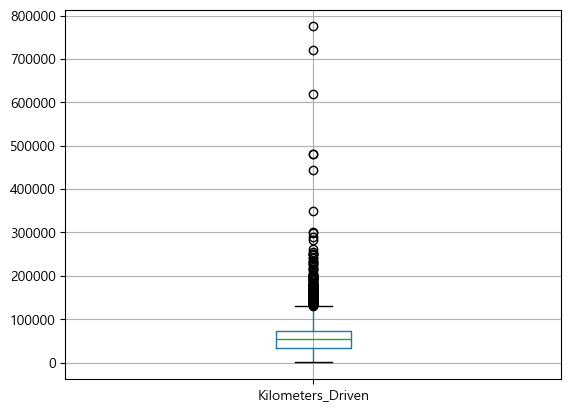

In [335]:
df.boxplot(['Kilometers_Driven'])

In [336]:
import pandas as pd
import plotly.express as px
import json
df_clean = df
df_clean[['manufacturer', 'car_model']] = df['Name'].str.split(n=1, expand=True)
df_clean[['car_model', 'car_option']] = df['car_model'].str.split(n=1, expand=True)
df_clean['manufacturer'].value_counts()
city_to_state = {
    'Mumbai': 'Maharashtra',
    'Hyderabad': 'Telangana',
    'Coimbatore': 'Tamil Nadu',
    'Kochi': 'Kerala',
    'Pune': 'Maharashtra',
    'Delhi': 'Delhi',
    'Kolkata': 'West Bengal',
    'Chennai': 'Tamil Nadu',
    'Jaipur': 'Rajasthan',
    'Bangalore': 'Karnataka',
    'Ahmedabad': 'Gujarat'
}
state_to_region = {
    'Maharashtra': 'South',
    'Telangana': 'South',
    'Tamil Nadu': 'South',
    'Kerala': 'South',
    'Delhi': 'North',
    'West Bengal': 'North',
    'Rajasthan': 'North',
    'Karnataka': 'South',
    'Gujarat': 'North'
}
df_clean['State'] = df_clean['Location'].map(city_to_state)
df_clean['Region'] = df_clean['State'].map(state_to_region)
df_clean = df_clean.drop(columns=['Name'])
df_clean = df_clean[['Region', 'State', 'Location', 'manufacturer', 'car_model', 'car_option', 'Year','Price', 'New_Price', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]
df_clean.head()

,Region,State,Location,manufacturer,car_model,car_option,Year,Price,New_Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,South,Maharashtra,Mumbai,Maruti,Wagon,R LXI CNG,2010,2682.68,NaN,72000.0,CNG,Manual,First,37.24,998.0,58.16,5.0
1,South,Maharashtra,Pune,Hyundai,Creta,1.6 CRDi SX Option,2015,19162.0,NaN,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0
2,South,Tamil Nadu,Chennai,Honda,Jazz,V,2011,6898.32,8.61 Lakh,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0
3,South,Tamil Nadu,Chennai,Maruti,Ertiga,VDI,2012,9197.76,NaN,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0
4,South,Tamil Nadu,Coimbatore,Audi,A4,New 2.0 TDI Multitronic,2013,27194.71,NaN,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0


In [337]:
most_common_location = df.groupby('Name')['Location'].agg(lambda x: x.value_counts().index[0])
print(most_common_location)

Name
Ambassador Classic Nova Diesel      Chennai
Audi A3 35 TDI Attraction           Chennai
Audi A3 35 TDI Premium               Mumbai
Audi A3 35 TDI Premium Plus          Mumbai
Audi A3 35 TDI Technology             Delhi
                                    ...    
Volvo XC60 D4 Summum              Hyderabad
Volvo XC60 D5                          Pune
Volvo XC60 D5 Inscription             Kochi
Volvo XC90 2007-2015 D5 AT AWD        Kochi
Volvo XC90 2007-2015 D5 AWD           Kochi
Name: Location, Length: 2039, dtype: object


In [338]:
top_20_names = df['Name'].value_counts().head(20)
print(top_20_names)

Name
Mahindra XUV500 W8 2WD              55
Maruti Swift VDI                    49
Maruti Swift Dzire VDI              42
Honda City 1.5 S MT                 39
Maruti Swift VDI BSIV               37
Maruti Ritz VDi                     35
Toyota Fortuner 3.0 Diesel          35
Hyundai Grand i10 Sportz            32
Honda Brio S MT                     32
Honda City 1.5 V MT                 32
Honda Amaze S i-Dtech               32
Hyundai i10 Sportz                  31
Maruti Alto LXi                     30
Maruti Wagon R LXI                  29
Maruti Ertiga VDI                   28
Volkswagen Polo 1.2 MPI Highline    26
Maruti Wagon R VXI                  25
Hyundai EON Era Plus                25
Hyundai Verna 1.6 SX                25
Skoda Superb Elegance 1.8 TSI AT    23
Name: count, dtype: int64


In [339]:
# 가장 많은 Name 20개에 해당하는 데이터 필터링
top_20_names_df = df[df['Name'].isin(top_20_names.index)]

# 각 Name별 많이 중복되는 Location 조회
most_common_location_top_20 = top_20_names_df.groupby('Name')['Location'].agg(lambda x: x.value_counts().index[0])
print(most_common_location_top_20)

Name
Honda Amaze S i-Dtech                  Kolkata
Honda Brio S MT                         Mumbai
Honda City 1.5 S MT                      Delhi
Honda City 1.5 V MT                    Kolkata
Hyundai EON Era Plus                    Jaipur
Hyundai Grand i10 Sportz                Mumbai
Hyundai Verna 1.6 SX                 Hyderabad
Hyundai i10 Sportz                       Kochi
Mahindra XUV500 W8 2WD              Coimbatore
Maruti Alto LXi                        Chennai
Maruti Ertiga VDI                         Pune
Maruti Ritz VDi                      Hyderabad
Maruti Swift Dzire VDI                 Kolkata
Maruti Swift VDI                          Pune
Maruti Swift VDI BSIV                Hyderabad
Maruti Wagon R LXI                       Delhi
Maruti Wagon R VXI                     Kolkata
Skoda Superb Elegance 1.8 TSI AT        Mumbai
Toyota Fortuner 3.0 Diesel               Delhi
Volkswagen Polo 1.2 MPI Highline        Mumbai
Name: Location, dtype: object
